In [2]:
# All imports
import cv2
import keyboard as kys
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import threading

In [3]:
# Define filters
sharpen1_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

sharpen2_kernel = np.array([[-1, -1, -1],
                            [-1, 9, -1],
                            [-1, -1, -1]])

edge1_kernel = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

edge2_kernel = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

In [31]:
# Define user input variables
sharpen1_set = False
sharpen2_set = False
edge1_set = False
edge2_set = False
scale_set = False

In [32]:
# Set up camera
cam = cv2.VideoCapture(0)

In [33]:
# Stop event for threads
stop_event = threading.Event()

In [35]:
# Function to read frames and apply filters
def process_frames():
    global sharpen1_kernel, sharpen2_kernel, edge1_kernel, edge2_kernel, sharpen1_set, sharpen2_set, edge1_set, edge2_set, scale_set, cam, stop_event
    while not stop_event.is_set():
        
        if cam.isOpened():
            # Read frame
            result, frame = cam.read()
            
            if result:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
                # Apply filters
                if sharpen1_set:
                    frame = cv2.filter2D(frame, -1, sharpen1_kernel)
                
                if sharpen2_set:
                    frame = cv2.filter2D(frame, -1, sharpen2_kernel)
                
                if edge1_set:
                    frame = cv2.filter2D(frame, -1, edge1_kernel)
                    
                if edge2_set:
                    frame = cv2.filter2D(frame, -1, edge2_kernel)
                
                if scale_set:
                    frame = cv2.resize(frame, (28,28))
                    
                # Display frame
                plt.imshow(frame, cmap='gray')
                plt.axis('off')
                plt.show()
                clear_output(wait=True)

In [36]:
# Function to handle user input
def handle_user_input():
    global sharpen1_set, sharpen2_set, edge1_set, edge2_set, scale_set, close_set, cam, stop_event
    while not stop_event.is_set():
        
        if kys.is_pressed('esc'):
            cam.release()
            stop_event.set()
        
        if kys.is_pressed('1'):
            sharpen1_set = not sharpen1_set
            
        if kys.is_pressed('2'):
            sharpen2_set = not sharpen2_set
            
        if kys.is_pressed('3'):
            edge1_set = not edge1_set    
        
        if kys.is_pressed('4'):
            edge2_set = not edge2_set
            
        if kys.is_pressed('s'):
            scale_set = not scale_set

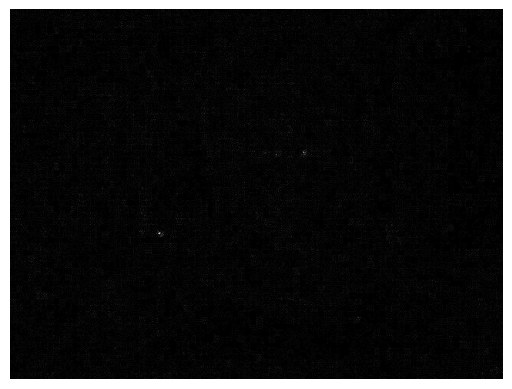

In [37]:
# Start threads for processing frames and handling user input
process_thread = threading.Thread(target=process_frames)
input_thread = threading.Thread(target=handle_user_input)

process_thread.start()
input_thread.start()

# Wait for threads to finish
process_thread.join()
input_thread.join()